In [1]:
%matplotlib inline 
import os,sys,shutil,cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


### Rename and copy the dataset 

In [2]:
# Rename the prefix
# Renaming image names in directory <dir>, changing <old_prefix>* to <new_prefix>*

old_prefix = "Sminthopsis_macroura_all_sutures_"
new_prefix = "Sminthopsis_macroura_all_sutures_0"

dir = "data/training_suture/img_all/"

files = os.listdir(dir)
for file in files:
    
    new_file = file.replace(old_prefix,new_prefix)
    os.rename(dir + file,
    dir + new_file)

old_prefix.replace(old_prefix,new_prefix)

print(f"""
      Renamed the files in {dir}
      Changing old prefix {old_prefix} to new prefix {new_prefix}
      """)   
        



      Renamed the files in data/training_suture/img_all/
      Changing old prefix Sminthopsis_macroura_all_sutures_ to new prefix Sminthopsis_macroura_all_sutures_0
      


In [14]:
# Copy images in <dir> that have the same file names as masks in <mask_dir> to <dst>
# To create an image folder that matches the exact number of the name of the mask folder.

dir = "data/training_suture/img_all"
dst = "data/training_suture/img/"

mask_dir = "data/training_suture/mask/"

mask_files = os.listdir(mask_dir)
files = os.listdir(dir)
for file in files:
    if file in mask_files:
        shutil.copyfile(os.path.join(dir, file), os.path.join(dst, file))
    
print(f"""
    {len(mask_files)} files from {dir} to {dst} were copied
      """)   

In [17]:
# Visualise the segmentation masks (pixel values from 1 to N)
# interpolate (0 to N) -> (0, 255)
# Reads in images from <mask_dir> and output visualised version in <vis_dir>

mask_dir = "data/suture_demo_data/cc_mask"
vis_dir = "data/suture_demo_data/visualised_cc"
Path(vis_dir).mkdir(parents=True, exist_ok=True)
files = os.listdir(mask_dir)
for file in files:
    img = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    img_ori = img.copy()
    cv2.imwrite(os.path.join(vis_dir,file), np.interp(img, [0, np.max(img)],[1,255]).astype('uint8')  )

print(f"""
      {len(files)} Masks were visualised in {vis_dir}
      """)   
        


      35 Masks were visualised in data/suture_demo_data/visualised_cc
      


### Manipulations on the masks values
Combining multiple classes to one. (e.g. turn class 1,3 to class 1)

Update the values for the segmented classes

In [6]:
### Update the pixel values ###



### To change ###

# mask_dir the directory for the origin masks, new_dir the directory for output masks
mask_dir = "data/training_suture/mask_ori/"
new_dir= "data/training_suture/mask/"
Path(new_dir).mkdir(parents=True, exist_ok=True)

### update old values to new values. Its use cases：
## 1. combine
# Processing origin masks 
# For example: transfer the masks from Dragonfly (1: bones, 2: suture, 3:background) to 
# masks that has only segmentation for suture and non-suture (1: non-suture and 2: suture)
# If user want to change the bones to the background (non sutures), which means all values of 1 are turned to 3
# They can define old_values as [1,2,3]. new_values as [3,2,3]

# old_values = [1,2,3]
# new_values = [3,2,3]

## 2. update

# Default: Transfer the masks to the format of the pixel value starts from  (e.g. the first class is 0, the second class is 1, ... the n th class is n-1)
# If old_values and new_values are None, the code turns all the detected values to 0,1... n

# old_values =None
# new_values = None

# Specify the values:
# If old_values and new_values are specified, it code turns values from old values to the new values
# This example, turns sutures from dragonfly (1: bones, 2: suture, 3:background)  to 
# (0:background, 1: bones, 2: suture) 
old_values = [1,2,3]
new_values = [1,2,0]



files = os.listdir(mask_dir)

for file in files:
    mask = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    if old_values is None or new_values is None:
        old_values = np.unique(mask)
        new_values = list(range(0, len(old_values)))
    

    mask_copy = mask.copy()
    for ov,nv in zip(old_values,new_values):
        mask[mask_copy==ov] = nv
        assert np.sum(mask_copy==ov) == np.sum(mask==nv), "an error occurs during the transfer"
    
    cv2.imwrite(os.path.join(new_dir,file), mask)
        

visual = False
# If the visual is set True, it will plot the old and new versions of the last mask
if visual:
    fig = plt.figure()
    fig.colorbar(plt.imshow(mask))
    fig = plt.figure()
    fig.colorbar(plt.imshow(mask_copy))


print(f"""
      Masks were transferred from {old_values} to {new_values}
      And they are saved in: {new_dir}
      {len(files)} files were processed
      """)   
        

    
    
 # --- deprecated   
    
### Processing origin masks ###
# Transfer the masks from Dragonfly (1: bones, 2: suture, 3:background) 
# to masks that has only segmentation for suture and non-suture (1: non-suture and 2: suture)
# <mask_dir> the directory for the origin masks, <new_dir> the directory for output masks
# mask_dir = "data/training_suture/mask_pad/"
# new_dir = "data/training_suture/mask_suture_only_pad/"

# files = os.listdir(mask_dir)
# for file in files:
#     img = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
#     # Turn 3: background to 1: non-suture
#     img[img==3]=1

#     cv2.imwrite(os.path.join(new_dir,file), img)


      Masks were transferred from [1, 2, 3] to [1, 2, 0]
      And they are saved in: data/training_suture/mask/
      147 files were processed
      


### Clean the masks


      Cleaning the noises of masks in data/training_suture/mask/
      And they are saved in: data/training_suture/mask_clean/
      147 files were processed
      


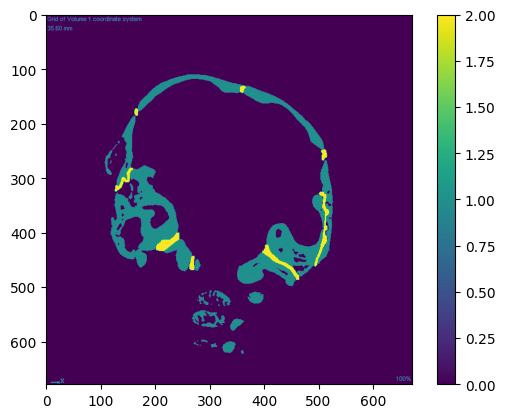

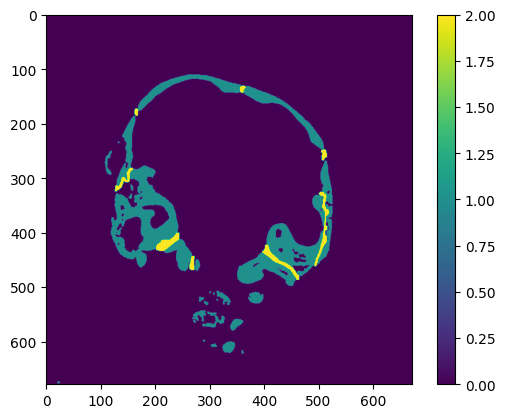

In [14]:
### Processing masks, Use open and close to remove noises.
## Cleaning the noises of the suture masks generated from the dragonfly,
##

# To change
# mask_dir: the directory of the masks
# new_dir: the directory of the cleaned masks
mask_dir = "data/training_suture/mask/"
new_dir = "data/training_suture/mask_clean/"
Path(new_dir).mkdir(parents=True, exist_ok=True)
#

files = os.listdir(mask_dir)
for file in files:
    # print(file)
    img = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    img_ori = img.copy()

    bone = (img==1).astype('uint8')
    background = (img==3).astype('uint8')
    
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(bone, cv2.MORPH_OPEN, kernel)

    img[(opening | (img==2))==0]=0
    assert np.sum(img==0) +np.sum(img==2) + np.sum(img==1) == img.size, "Mask value not matching"
    
    # # Turn 3: background to 1: non-suture
    # img[img==3]=2

    cv2.imwrite(os.path.join(new_dir,file), img)


visual = True
# If the visual is set True, it will plot the old and new versions of the last mask
if visual:
    fig = plt.figure()
    fig.colorbar(plt.imshow(img_ori))
    fig = plt.figure()
    fig.colorbar(plt.imshow(img))

print(f"""
      Cleaning the noises of masks in {mask_dir}
      And they are saved in: {new_dir}
      {len(files)} files were processed
      """)   
        

### Crop and pad images and masks


      Images and masks from data/training_suture/img/ and data/training_suture/mask_clean/ are cropped
      And they are saved in: data/training_suture/img_crop/ and data/training_suture/mask_crop/
      147 files were processed
      


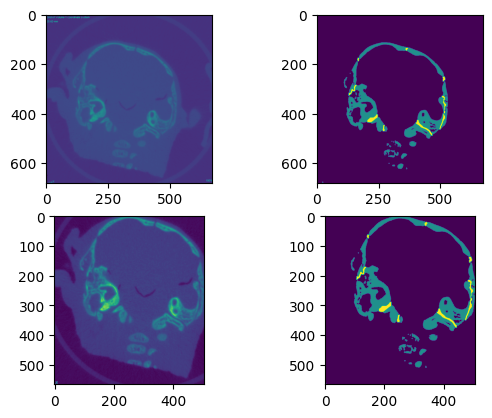

In [15]:
## Cropping the images and masks to have better focus on the object
## Use the min/max x and min/max y of bones or sutures of the masks as the cropping coordinates


# **To change** to fit your dataset
# mask_dir: the directory of the masks
# new_dir: the directory of the cleaned masks
# img_crop_dir: the directory for the cropped images
# mask_crop_dir: the directory for the cropped images
img_dir = "data/training_suture/img/"
mask_dir = "data/training_suture/mask_clean/"

img_crop_dir = "data/training_suture/img_crop/"
mask_crop_dir= "data/training_suture/mask_crop/"

Path(img_crop_dir).mkdir(parents=True, exist_ok=True)
Path(mask_crop_dir).mkdir(parents=True, exist_ok=True)
#

files = os.listdir(mask_dir)
for file in files:
    # print(file)
    
    mask = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    mask_ori = mask.copy()
    # get the index of bones or sutures
    # first array is the row (img height) and the second array is the col (img width)
    row_id, col_id = np.where((mask == 1) | (mask == 2))

    min_h = np.min(row_id)
    max_h = np.max(row_id)

    min_w = np.min(col_id)
    max_w = np.max(col_id)

    mask = mask[min_h:max_h+1 ,min_w:max_w+1]
    cv2.imwrite(os.path.join(mask_crop_dir,file), mask)

    img = cv2.imread(os.path.join(img_dir , file), cv2.IMREAD_GRAYSCALE )
    img_ori = img.copy()

    img = img[min_h:max_h+1 ,min_w:max_w+1]
    cv2.imwrite(os.path.join(img_crop_dir,file), img)

visual = True
# If the visual is set True, it will plot the original and cropped images and masks.
if visual:
    fig = plt.figure()
    plt.subplot(2, 2, 1)
    plt.imshow(img_ori)
    
    plt.subplot(2, 2, 2)
    plt.imshow(mask_ori)

    plt.subplot(2, 2, 3)
    plt.imshow(img)
    
    plt.subplot(2, 2, 4)
    plt.imshow(mask)
    


print(f"""
      Images and masks from {img_dir} and {mask_dir} are cropped
      And they are saved in: {img_crop_dir} and {mask_crop_dir}
      {len(files)} files were processed
      """)   



      Images and masks from data/suture_demo_data/cc_img/ and data/suture_demo_data/cc_mask/ are padded to 983 x 942
      And they are saved in: data/suture_demo_data/cc_img/ and data/suture_demo_data/cc_mask
      35 files were processed
      


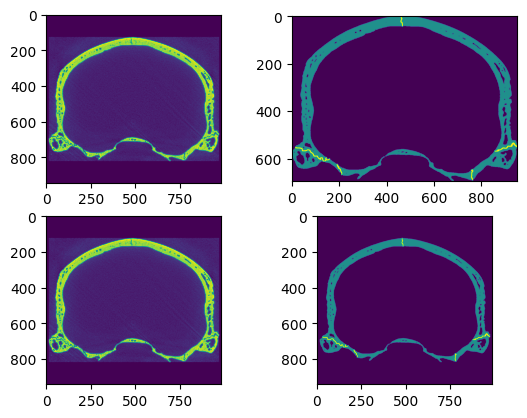

In [16]:
### Padding the images to the largest resolution ###
# The training set 1.0 's largest resolution is 1681 x 1820
# padding both training images and masks
# The current padding method make the original image as the center


# **To change** to fit your dataset
# mask_dir: the directory of the masks
# new_dir: the directory of the cleaned masks
# pad_img_dir: the directory for the cropped images
# pad_mask_dir: the directory for the cropped images
img_dir = "data/suture_demo_data/img_crop/"
mask_dir = "data/suture_demo_data/mask_crop/"

pad_img_dir = "data/suture_demo_data/img_crop_pad/"
pad_mask_dir = "data/suture_demo_data/mask_crop_pad"

Path(pad_img_dir).mkdir(parents=True, exist_ok=True)
Path(pad_mask_dir).mkdir(parents=True, exist_ok=True)

files = os.listdir(img_dir)

width = 0
height = 0

for file in files:
    ## Read, pad and write images
    img = cv2.imread(os.path.join(img_dir , file), cv2.IMREAD_GRAYSCALE )
    mask = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    h1,w1 = img.shape
    
    h2,w2 = mask.shape
    
    if h1>height:
        height = h1
    if h2>height:
        height = h2

    
    if w1>width:
        width = w1
    if w2>width:
        width = w2



for file in files:
    ## Read, pad and write images
    img = cv2.imread(os.path.join(img_dir , file), cv2.IMREAD_GRAYSCALE )
    
    w = img.shape[1]
    h = img.shape[0]
    w_diff = width - w
    h_diff = height - h

    # print(f'''image width {w} and height {h}''')

    dst = cv2.copyMakeBorder(img , h_diff//2, h_diff - (h_diff//2),
                            w_diff//2 ,w_diff -(w_diff//2),cv2.BORDER_CONSTANT,None,
                            [0, 0, 0] )
    # print(f'''new image shape {dst.shape} ''')

    cv2.imwrite(os.path.join(pad_img_dir , file) , dst)
    
    ## read, pad and write masks
    mask = cv2.imread(os.path.join(mask_dir , file), cv2.IMREAD_GRAYSCALE )
    
    w = mask.shape[1]
    h = mask.shape[0]
    w_diff = width - w
    h_diff = height - h

    # print(f'''image width {w} and height {h}''')

    dst_mask = cv2.copyMakeBorder(mask , h_diff//2, h_diff - (h_diff//2),
                            w_diff//2 ,w_diff -(w_diff//2),cv2.BORDER_CONSTANT,None,
                            0 )
    # print(f'''new image shape {dst.shape} ''')

    cv2.imwrite(os.path.join(pad_mask_dir , file) , dst_mask)


visual = True
# If the visual is set True, it will plot the original and cropped images and masks.
if visual:
    fig = plt.figure()
    
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    
    plt.subplot(2, 2, 2)
    plt.imshow(mask)
    
    plt.subplot(2, 2, 3)
    plt.imshow(dst)
    
    plt.subplot(2, 2, 4)
    plt.imshow(dst_mask)


print(f"""
      Images and masks from {img_dir} and {mask_dir} are padded to {width} x {height}
      And they are saved in: {pad_img_dir} and {pad_mask_dir}
      {len(files)} files were processed
      """)    